# Proyecto 2 - Data Science
Carlos Alberto Camacho - 202160331 - 3743  
Kevin Alexander Marín - 202160364 - 3743  
Harrison Inney Valencia - 202159979 - 3743  

## 1. Análisis Descriptivo

In [14]:
!pip install pandas numpy matplotlib seaborn 


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(plt.style.available)


plt.style.use('seaborn-v0_8')


%matplotlib inline

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
avocado = pd.read_csv('avocado.csv')
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Exploración inicial de datos

In [3]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Analisis de columnas numericas del dataset

Se hace para detectar valores extremos, tendencias generales y distribución de los datos numéricos.

In [4]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Analisis estadistico de las columnas

Tener una visión completa, incluyendo tipos de aguacate, regiones, fechas, etc. Muy útil para encontrar columnas con baja variedad o problemas de calidad de datos.

In [5]:
avocado.describe(include='all')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,NaN,2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Albany
freq,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,24.232232,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,0.000000,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,10.000000,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,24.000000,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,38.000000,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


Analisis del tipo de datos

Lo hacemos para ver si alguna columna tiene un tipo incorrecto (por ejemplo, fechas como texto o números como strings) y preparar la limpieza.

In [6]:
print(avocado.dtypes)

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object


### Exploración Visual

#### HeadMap para comprobar la inexistencia de datos nulos

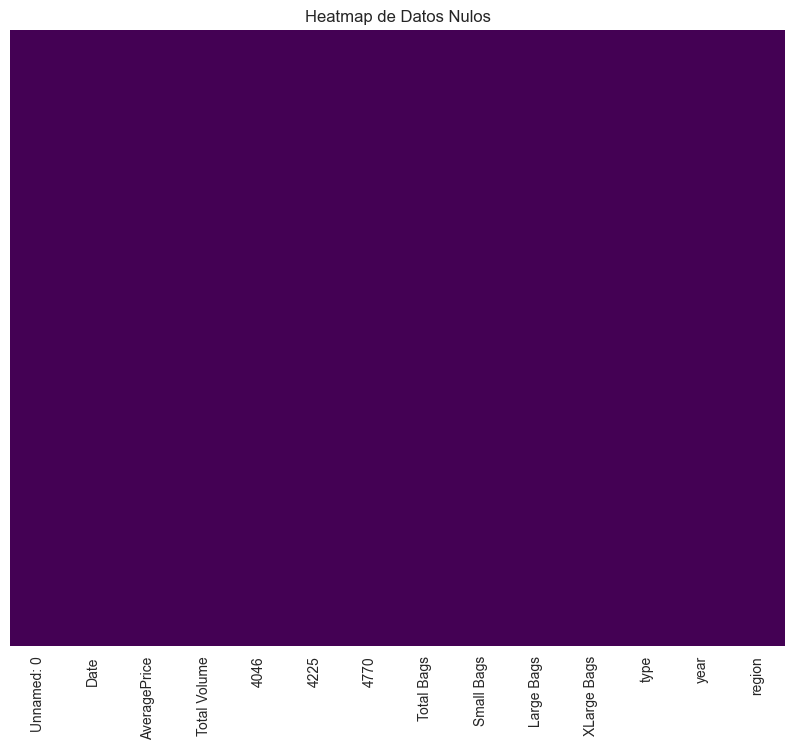

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(avocado.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap de Datos Nulos')
plt.show()

#### Histograma de variables numéricas

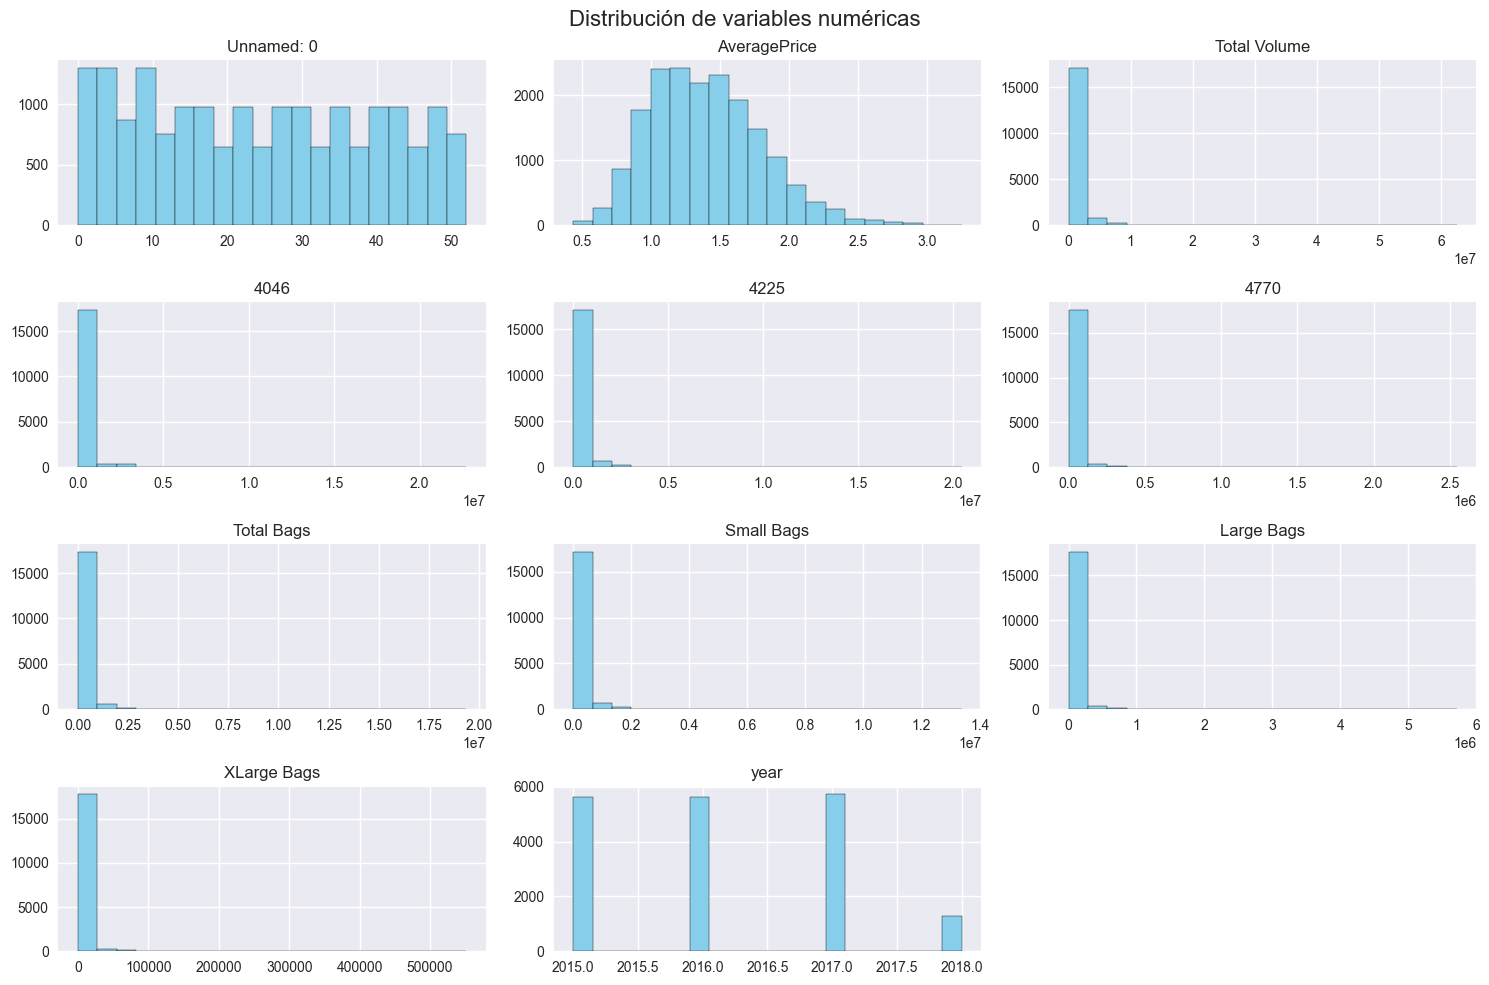

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

avocado.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

#### Boxplot de variables númericas

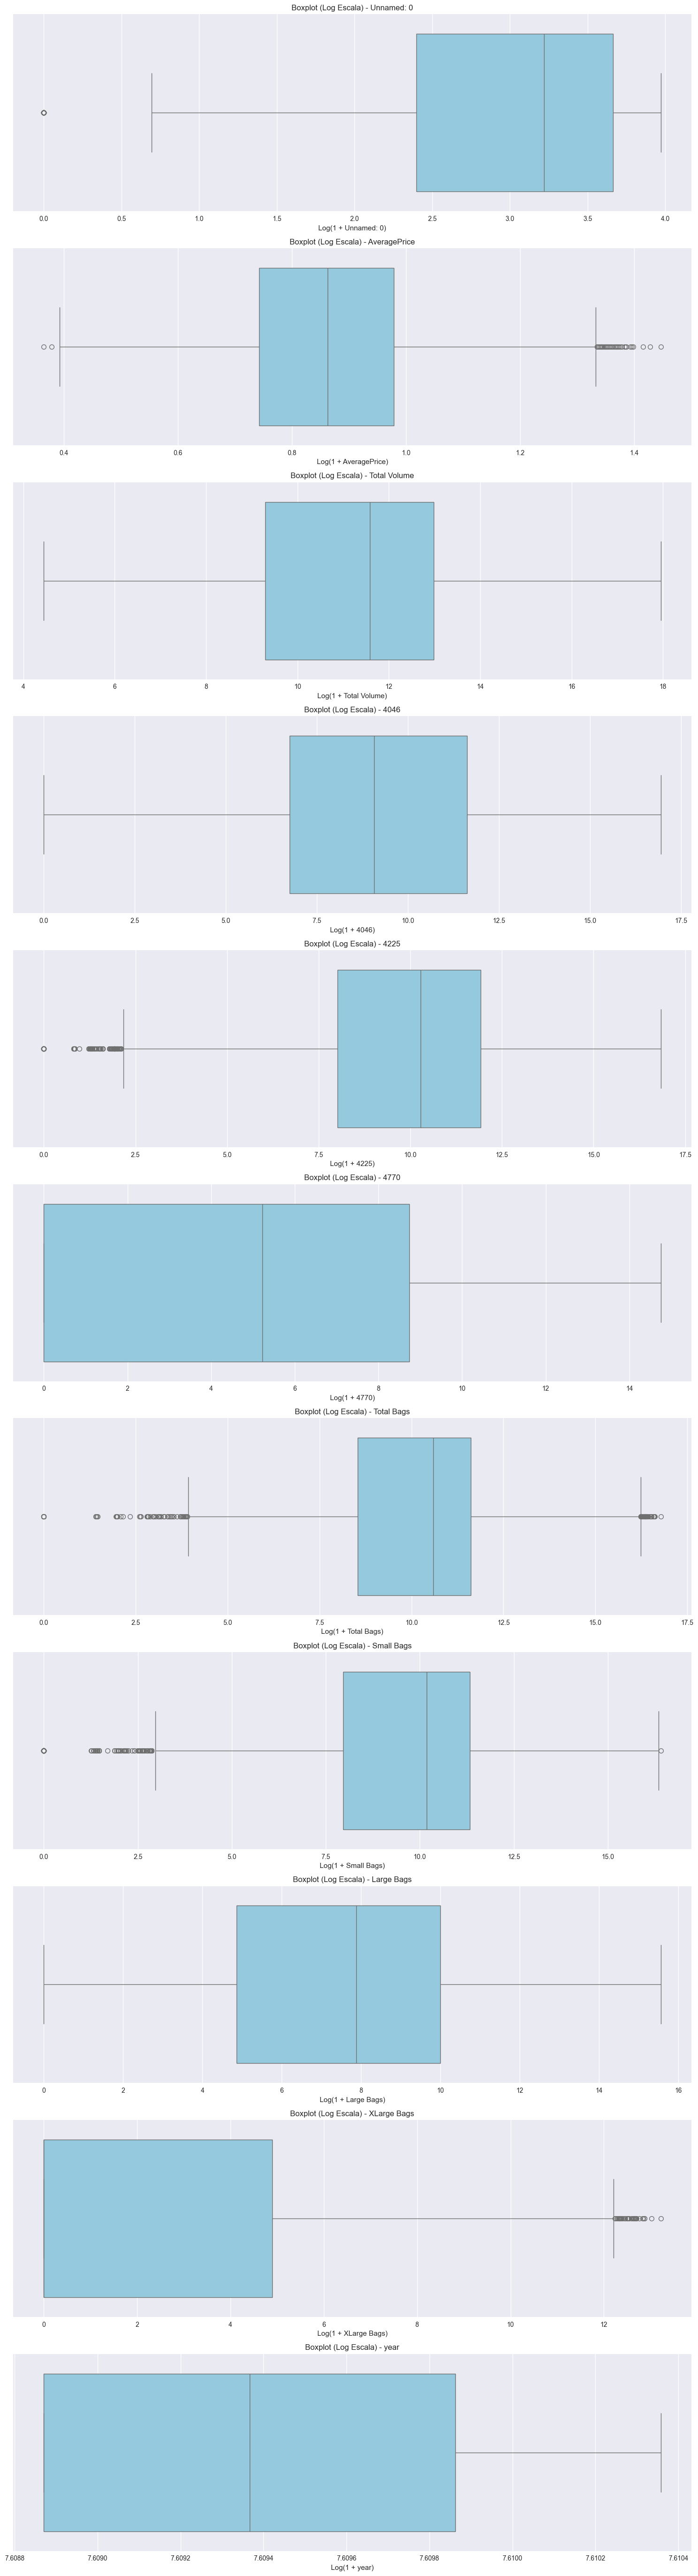

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


numeric_cols = avocado.select_dtypes(include='number').columns


plt.figure(figsize=(15, 5 * len(numeric_cols)))  

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    
    log_data = np.log1p(avocado[col])
    
    sns.boxplot(x=log_data, color='skyblue')
    plt.title(f'Boxplot (Log Escala) - {col}')
    plt.xlabel(f'Log(1 + {col})')

plt.tight_layout()
plt.show()


#### Histograma tipos de aguacate

C:\Users\HARRISON\AppData\Local\Temp\ipykernel_22152\3747817486.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=avocado, x='type', palette='Set2')


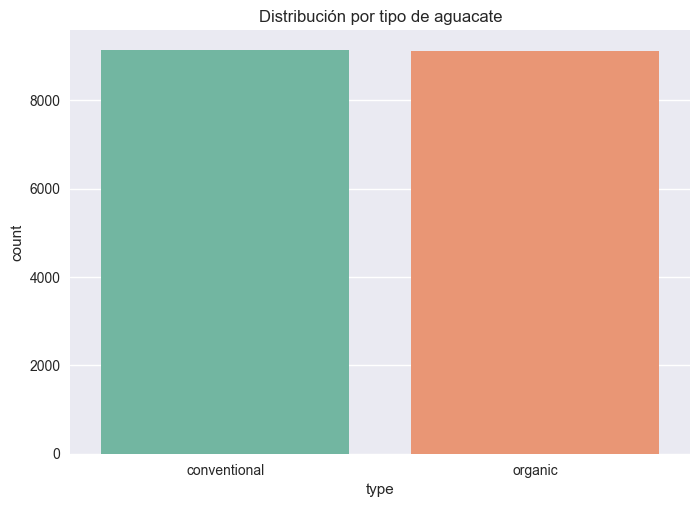

In [10]:
sns.countplot(data=avocado, x='type', palette='Set2')
plt.title("Distribución por tipo de aguacate")
plt.show()

#### Precio promedio por tipo de aguacate

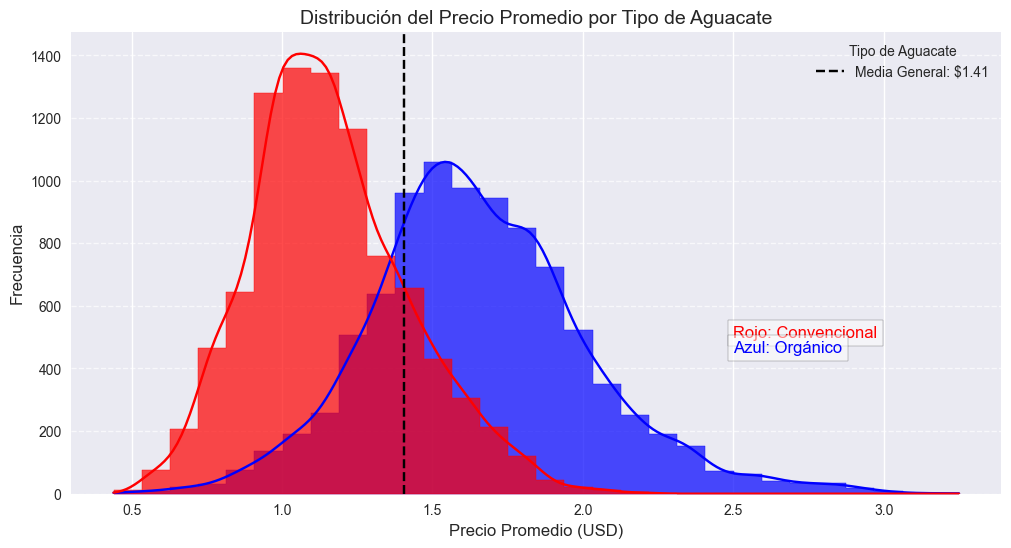

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(data=avocado, x='AveragePrice', hue='type', bins=30, kde=True, element="step", palette={"conventional": "red", "organic": "blue"}, alpha=0.7)
plt.axvline(avocado['AveragePrice'].mean(), color='black', linestyle='--', label=f'Media General: ${avocado["AveragePrice"].mean():.2f}')
plt.title('Distribución del Precio Promedio por Tipo de Aguacate', fontsize=14)
plt.xlabel('Precio Promedio (USD)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)


plt.text(2.5, 500, "Rojo: Convencional", color="red", fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(2.5, 450, "Azul: Orgánico", color="blue", fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.legend(title='Tipo de Aguacate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### HeatMap correlación de valores

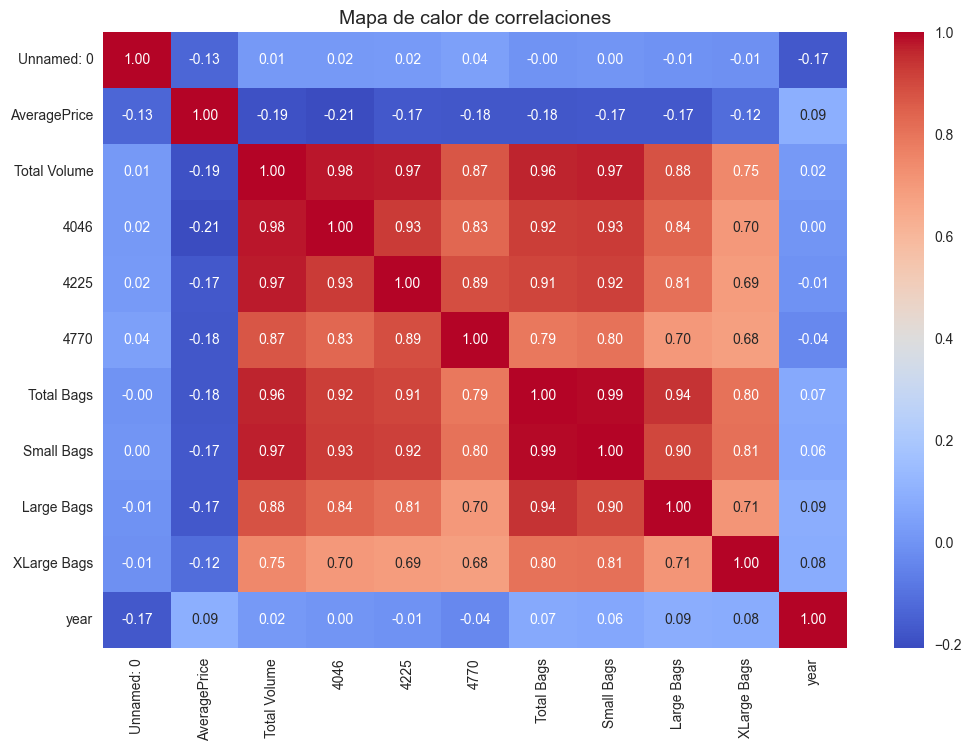

In [12]:
plt.figure(figsize=(12, 8))

correlation_matrix = avocado.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de correlaciones", fontsize=14)
plt.show()


#### Reorganizar la matriz de correlación para agrupar variables más correlacionadas

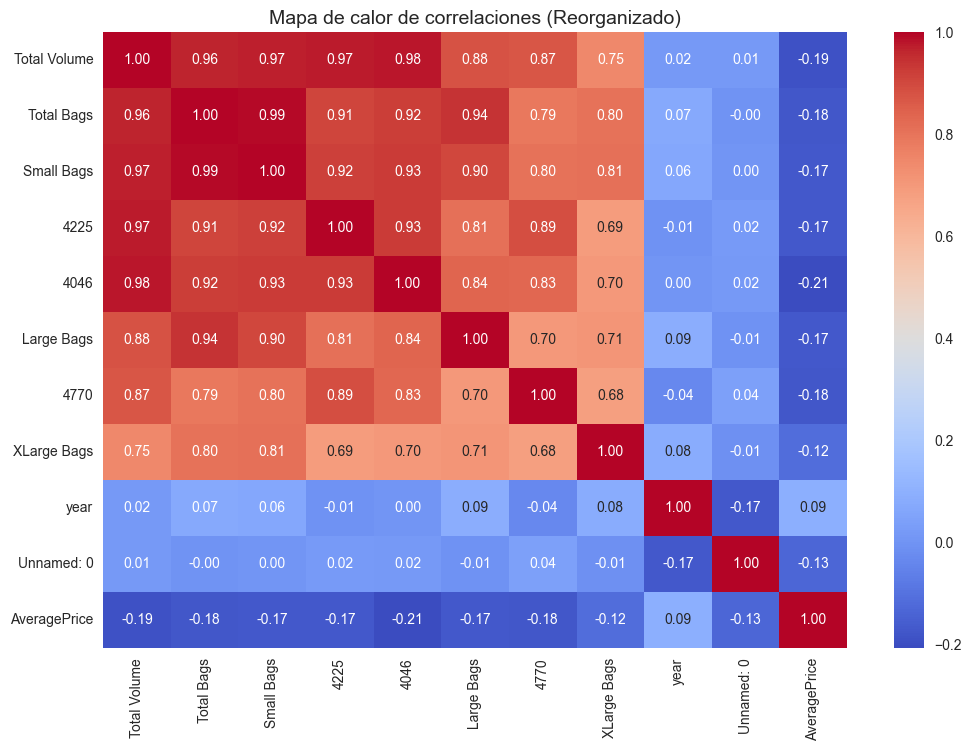

In [13]:
ordered_corr = correlation_matrix.reindex(
    correlation_matrix.sum().sort_values(ascending=False).index, axis=0
).reindex(
    correlation_matrix.sum().sort_values(ascending=False).index, axis=1
)

plt.figure(figsize=(12, 8))
sns.heatmap(ordered_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de correlaciones (Reorganizado)", fontsize=14)
plt.show()

La matriz de correlación muestra la relación entre las variables numéricas del dataset. Los valores van de -1 a 1, donde:
- Un valor cercano a 1 indica una correlación positiva fuerte (cuando una variable aumenta, la otra también).
- Un valor cercano a -1 indica una correlación negativa fuerte (cuando una variable aumenta, la otra disminuye).
- Un valor cercano a 0 indica poca o ninguna correlación.


- 'Total Bags' tiene una correlación casi perfecta con 'Small Bags' (0.99), lo que sugiere que la mayoría de las bolsas son pequeñas.
- 'Total Volume' está altamente correlacionado con las variables '4046', '4225' y '4770', indicando que estas contribuyen significativamente al volumen total.
- 'AveragePrice' tiene correlaciones negativas débiles con todas las demás variables, lo que sugiere que el precio promedio no está fuertemente relacionado con el volumen o las bolsas.

#### Gráfico de dispersión con regresión lineal

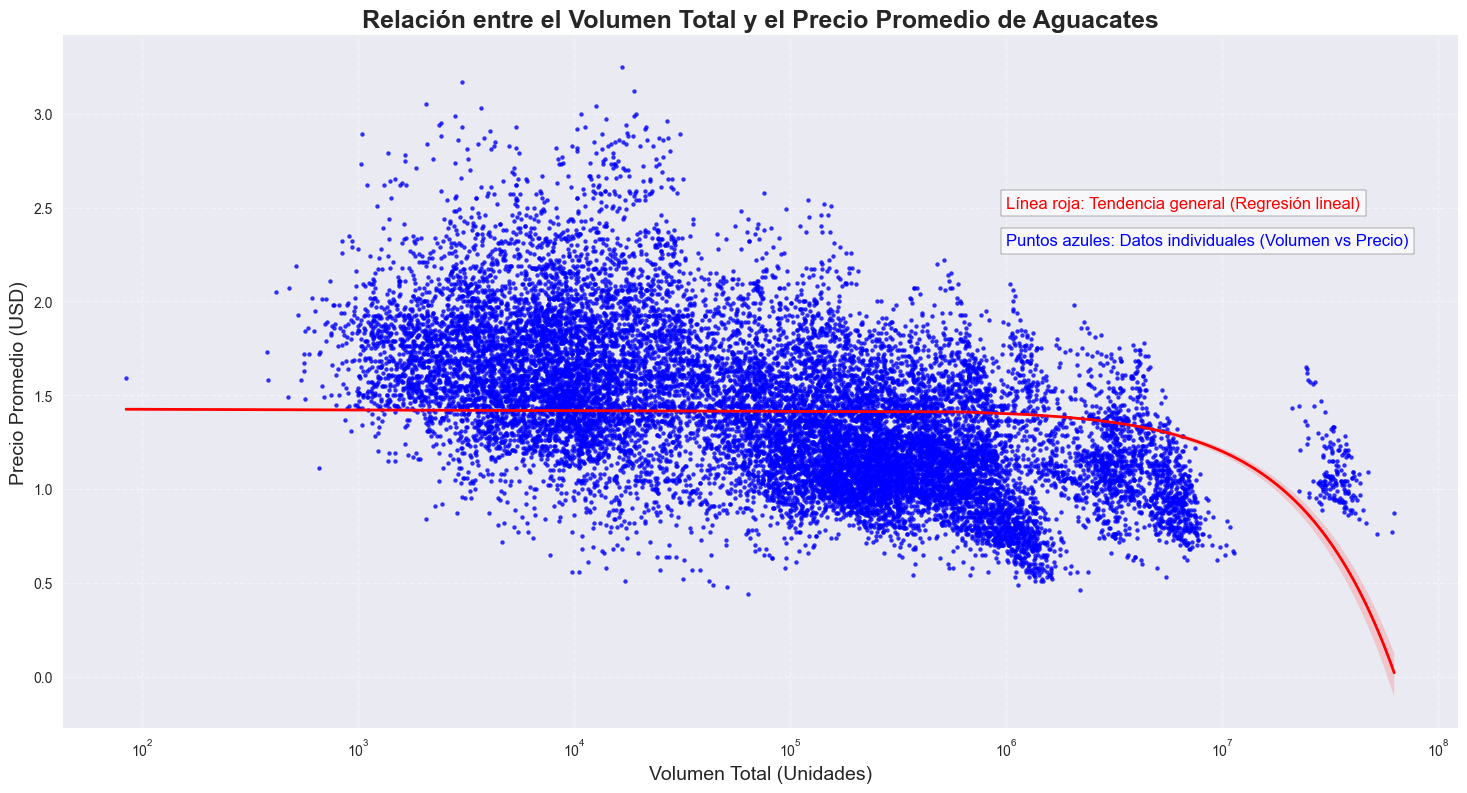

In [14]:
plt.figure(figsize=(18, 9))

sns.regplot(
    data=avocado, 
    x='Total Volume', 
    y='AveragePrice', 
    scatter_kws={'alpha': 0.8, 'color': 'blue', 's': 10},  
    line_kws={'color': 'red', 'linewidth': 2}  
)

plt.title('Relación entre el Volumen Total y el Precio Promedio de Aguacates', fontsize=18, fontweight='bold')
plt.xlabel('Volumen Total (Unidades)', fontsize=14)
plt.ylabel('Precio Promedio (USD)', fontsize=14)


plt.xscale('log')


plt.grid(True, linestyle='--', alpha=0.4)


plt.text(1e6, 2.5, "Línea roja: Tendencia general (Regresión lineal)", color="red", fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.text(1e6, 2.3, "Puntos azules: Datos individuales (Volumen vs Precio)", color="blue", fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.show()

La gráfica muestra la relación entre el volumen total de aguacates vendidos y el precio promedio. Se observa una tendencia general negativa, representada por la línea roja de regresión lineal, lo que indica que a medida que aumenta el volumen total, el precio promedio tiende a disminuir. Los puntos azules representan los datos individuales, con una mayor concentración en volúmenes bajos y precios más altos, especialmente para los aguacates orgánicos. La escala logarítmica en el eje X permite visualizar mejor la amplia variación en los volúmenes.

## 2. Limpieza y Normalización

In [15]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Valores Nulos

In [17]:
print(avocado.isnull().sum())

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


No se cuenta con valores nulos

### Comprobación

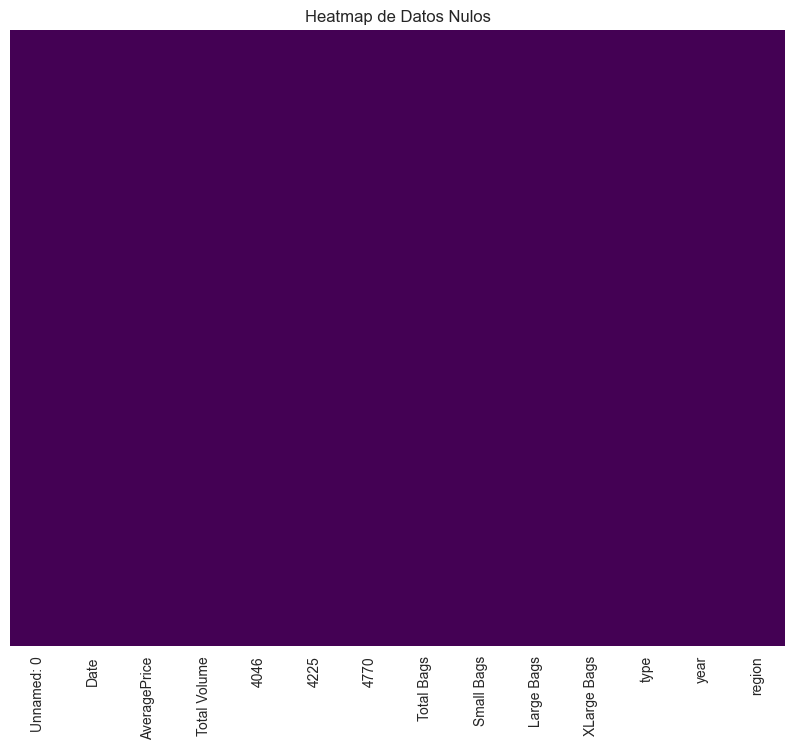

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(avocado.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap de Datos Nulos')
plt.show()

### Reconocimiento de Valores Atípicos

#### Identificación con IQR

El **IQR (Rango Intercuartílico)** se utiliza para detectar valores atípicos en variables numéricas. Se calcula como:


Donde:  
- **Q1** = Percentil 25 (primer cuartil)  
- **Q3** = Percentil 75 (tercer cuartil)

Un valor se considera atípico si se encuentra fuera del siguiente rango:

[ Q1 - 1.5 × IQR , Q3 + 1.5 × IQR ]

In [19]:
def detectar_outliers(df, column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]
outliers = detectar_outliers(avocado, 'Total Volume')

print(f"Numero de valores atipicos en 'Total Volume': {len(outliers)}")

Numero de valores atipicos en 'Total Volume': 2297


### Manejo de Valores Atípicos

- **Aplicación de transformación logarítmica:**  
  Esta técnica resulta eficaz para datos con distribución exponencial, ya que permite reducir la magnitud de los valores extremos sin alterar su relación dentro del conjunto de datos.  

- **Uso de Winsorization:**  
  En lugar de eliminar valores atípicos, esta estrategia ajusta los datos extremos dentro de un rango predefinido, conservando la estructura original mientras limita su impacto.


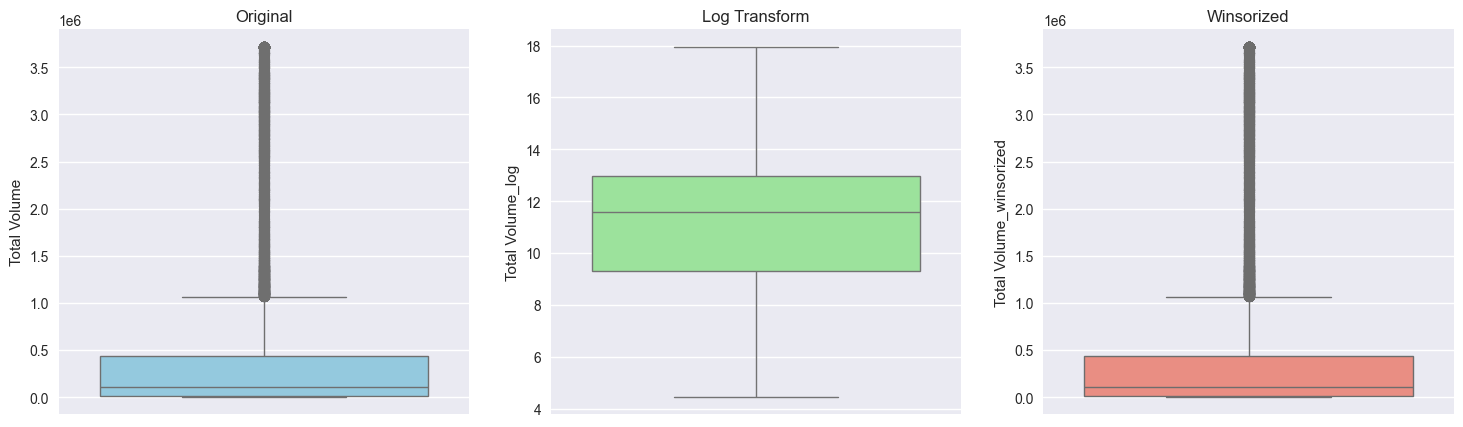

In [20]:
#Transformación logarítmica
avocado['Total Volume_log'] = np.log1p(avocado['Total Volume'])

#Winsorization
from scipy.stats.mstats import winsorize
avocado['Total Volume_winsorized'] = winsorize(avocado['Total Volume'], limits=[0.05, 0.05])

# Gráfico
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=avocado['Total Volume'], ax=axes[0], color='skyblue').set_title('Original')
sns.boxplot(y=avocado['Total Volume_log'], ax=axes[1], color='lightgreen').set_title('Log Transform')
sns.boxplot(y=avocado['Total Volume_winsorized'], ax=axes[2], color='salmon').set_title('Winsorized')

plt.show()

### Convertir variables categóricas a Dummies

In [21]:
avocado = pd.get_dummies(avocado, columns=['type'], drop_first=True)

Comprobaciones

In [22]:
print(avocado.head())


   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags  year  region  \
0   48.16     8696.87     8603.62       93.25          0.0  2015  Albany   
1   58.33     9505.56     9408.07       97.49          0.0  2015  Albany   
2  130.50     8145.35     8042.21      103.14          0.0  2015  Albany   
3   72.58     5811.16     5677.40      133.76          0.0  2015  Albany   
4   75.78     6183.95     5986.26      197.69          0.0  2015  Albany   

   Total Volume_log  Total Volume_winsorized  type_organic  
0         11.070344

In [23]:
print(avocado['type_organic'].value_counts())


type_organic
False    9126
True     9123
Name: count, dtype: int64


Al usar una variable dummy, cada categoría recibe su propia columna, permitiendo que el modelo capture la información sin influencias indebidas.

Este enfoque optimiza el análisis y el uso en modelos predictivos al evitar redundancias.

### Normalización de Datos

#### Convertir fecha a características numéricas

Las fechas en su formato original no pueden ser interpretadas directamente por modelos de aprendizaje automático. Transformarlas en variables numéricas ayuda a capturar patrones temporales relevantes.  

#### Beneficios de la transformación  

- **Detección de tendencias estacionales:**  
  Convertir la fecha en el **mes** permite analizar fluctuaciones en la demanda o el precio de los productos a lo largo del año.  
- **Captura de variaciones semanales:**  
  Extraer el **día de la semana** ayuda a detectar diferencias en comportamiento (por ejemplo, si las ventas aumentan los fines de semana).  
- **Eliminación de información irrelevante:**  
  Mantener la fecha como un objeto no aporta información útil para los modelos predictivos, pero convertirla en atributos numéricos sí.  

In [24]:
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado['month'] = avocado['Date'].dt.month
avocado['day_of_week'] = avocado['Date'].dt.dayofweek
avocado.drop('Date', axis=1, inplace=True)

#### Normalizar región

**One-Hot Encoding:**

One-Hot Encoding crea columnas binarias para cada categoría.


In [25]:
top_regions = avocado['region'].value_counts().nlargest(10).index
avocado['region'] = avocado['region'].apply(lambda x: x if x in top_regions else 'Other')
avocado = pd.get_dummies(avocado, columns=['region'], drop_first=True)


**One-Hot Encoding:**

- Crea una columna binaria para cada región.  
- Es útil para modelos que no asumen relaciones entre categorías.  
- Aumenta la dimensionalidad del dataset.  

#### Estandarización

Para normalizar un dataset, generalmente se trabaja con columnas numéricas. En el caso del dataset avocado, podemos normalizar las columnas que contienen valores continuos, como precios, volúmenes de ventas, o cualquier otra métrica numérica. La normalización es útil para escalar los valores a un rango común, como [0, 1], o para que tengan una media de 0 y una desviación estándar de 1.

In [26]:
print(avocado.select_dtypes(include=['number']).columns)

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'Total Volume_log', 'Total Volume_winsorized', 'month', 'day_of_week'],
      dtype='object')


Estas son las columnas númericas del dataset.

#### Min - Max Scalling

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
avocado_scaled = avocado.copy()
numeric_columns = avocado.select_dtypes(include=['number']).columns
avocado_scaled[numeric_columns] = scaler.fit_transform(avocado[numeric_columns])

El Min-Max Scaling es una técnica de normalización que transforma los valores de las columnas numéricas para que estén dentro de un rango específico, generalmente entre 0 y 1. 

Identificamos las columnas numéricas como vimos anteriormente y esto seleccionó todas las columnas del DataFrame avocado que contienen datos numéricos.




In [28]:
avocado_scaled[numeric_columns] = scaler.fit_transform(avocado[numeric_columns])

Para cada columna numérica, el valor mínimo de la columna se convirtió en 0 y el valor máximo en 1.
Los valores intermedios se escalaron proporcionalmente entre 0 y 1.
Creó un nuevo DataFrame escalado:

avocado_scaled es una copia del DataFrame original avocado, pero con las columnas numéricas transformadas al rango [0, 1].

Ejemplo práctico:
Si una columna Total Volume tiene valores entre 1000 y 5000:

- Un valor de 1000 se convierte en ( \frac{1000 - 1000}{5000 - 1000} = 0 ).  
- Un valor de 3000 se convierte en ( \frac{3000 - 1000}{5000 - 1000} = 0.5 ).  
- Un valor de 5000 se convierte en ( \frac{5000 - 1000}{5000 - 1000} = 1 ).  

Ventajas del Min-Max Scaling:  
Es útil para algoritmos sensibles a la escala de los datos, como redes neuronales o métodos basados en distancia (p. ej., KNN, clustering).
Mantiene la distribución relativa de los datos.
Si necesitas verificar los valores escalados o realizar un análisis posterior, indícalo.

## 3. Implementación de Modelos Predictivos

**Importaciones necesarias**

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler


**División en conjuntos de entrenamiento y prueba**  
   - Se divide el dataset en **70% entrenamiento** y **30% prueba** para una mayor exactitud.

In [35]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = avocado.drop('AveragePrice', axis=1)  
y = avocado['AveragePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar las dimensiones de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape, y_test.shape)

Tamaño del conjunto de entrenamiento: (12774, 25) (12774,)
Tamaño del conjunto de prueba: (5475, 25) (5475,)


**Los variables númericas ya están estandarizadas en el anterior paso con Min - Max.**

### **Regresión Lineal**


   - Simple y fácil de interpretar.
   - Útil para entender la relación entre variables independientes y el precio promedio.
   - Métricas clave: **R²**, **MSE**, **MAE**.

#### Entrenamiento y evaluación del modelo de regresión lineal

Este código implementa un modelo de **Regresión Lineal** para predecir la variable objetivo, evaluando su desempeño con métricas clave.

#### **1. Creación y entrenamiento del modelo**


In [36]:
# Crear el modelo de regresión lineal
linear_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
linear_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Evaluar el modelo
mserl = mean_squared_error(y_test, y_pred)
maerl = mean_absolute_error(y_test, y_pred)
r2rl = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Métricas del modelo de Regresión Lineal:")
print(f"Mean Squared Error (MSE): {mserl:.2f}")
print(f"Mean Absolute Error (MAE): {maerl:.2f}")
print(f"R² Score: {r2rl:.2f}")

Métricas del modelo de Regresión Lineal:
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.22
R² Score: 0.47


#### **Explicación:**   
**Creación del modelo:**   

Se utiliza LinearRegression de sklearn para crear un modelo de regresión lineal.

**Entrenamiento:**  

El modelo se entrena con los datos de entrenamiento (X_train y y_train).

**Predicciones:**  

Se generan predicciones (y_pred) en el conjunto de prueba (X_test).

**Evaluación:**

- MSE (Mean Squared Error): Promedio de los errores al cuadrado.  
- MAE (Mean Absolute Error): Promedio de los errores absolutos.  
- R² Score: Proporción de la varianza explicada por el modelo.  

**Resultado:**

Este código nos permite evaluar qué tan bien el modelo de regresión lineal predice el precio promedio (AveragePrice) en el dataset.

### **Random Forest Regressor**

- Modelo robusto basado en múltiples árboles de decisión.
- Captura relaciones no lineales entre las variables.
- Reduce el sobreajuste mediante el promedio de múltiples árboles.
- Útil para comparar con modelos más simples como la regresión lineal.

#### Entrenamiento y evaluación del modelo Random Forest

Este código implementa un modelo de **Random Forest Regressor** para predecir la variable objetivo. Se evalúa el rendimiento del modelo utilizando las siguientes métricas:

- **R²** (Coeficiente de determinación)  
- **MSE** (Error Cuadrático Medio)  
- **MAE** (Error Absoluto Medio)


In [39]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
mserf = mean_squared_error(y_test, y_pred)
maerf = mean_absolute_error(y_test, y_pred)
r2rf = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Métricas del modelo Random Forest Regressor:")
print(f"Mean Squared Error (MSE): {mserf:.2f}")
print(f"Mean Absolute Error (MAE): {maerf:.2f}")
print(f"R² Score: {r2rf:.2f}")

Métricas del modelo Random Forest Regressor:
Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.10
R² Score: 0.88


#### **Explicación:**  

**Creación del modelo:**  

RandomForestRegressor crea un modelo basado en un conjunto de árboles de decisión.
n_estimators=100: Especifica el número de árboles en el bosque.
random_state=42: Asegura reproducibilidad.

**Entrenamiento:**  

El modelo se entrena con los datos de entrenamiento (X_train y y_train).

**Predicciones:**  

Se generan predicciones (y_pred) en el conjunto de prueba (X_test).

**Evaluación:**  

- MSE (Mean Squared Error): Promedio de los errores al cuadrado.  
- MAE (Mean Absolute Error): Promedio de los errores absolutos.  
- R² Score: Proporción de la varianza explicada por el modelo.  

**Resultado:**  

Este modelo es más robusto que la regresión lineal y puede capturar relaciones no lineales entre las variables independientes y la variable objetivo.

### **Redes Neuronales**

### Modelo: Red Neuronal (MLPRegressor)

- Modelo inspirado en el funcionamiento del cerebro humano.
- Adecuado para capturar patrones complejos y relaciones no lineales.
- Requiere más datos y ajuste de hiperparámetros.
- Puede superar a modelos tradicionales en problemas con alta complejidad.

#### Entrenamiento y evaluación del modelo de Red Neuronal

Este código entrena una **Red Neuronal Multicapa (MLPRegressor)** para estimar la variable objetivo. El desempeño del modelo se evalúa usando las métricas estándar:

- **R²** (Coeficiente de determinación)  
- **MSE** (Error Cuadrático Medio)  
- **MAE** (Error Absoluto Medio)



In [40]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de Red Neuronal Multicapa
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Entrenar el modelo con los datos escalados
mlp_model.fit(X_train_scaled, y_train)

# Realizar predicciones con los datos escalados
y_pred = mlp_model.predict(X_test_scaled)

# Evaluar el modelo
msern = mean_squared_error(y_test, y_pred)
maern = mean_absolute_error(y_test, y_pred)
r2rn = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Métricas del modelo de Red Neuronal (MLPRegressor):")
print(f"Mean Squared Error (MSE): {msern:.2f}")
print(f"Mean Absolute Error (MAE): {maern:.2f}")
print(f"R² Score: {r2rn:.2f}")

Métricas del modelo de Red Neuronal (MLPRegressor):
Mean Squared Error (MSE): 0.05
Mean Absolute Error (MAE): 0.17
R² Score: 0.67


### **Explicación:**  

**Creación del modelo:**

hidden_layer_sizes=(100, 50): Define dos capas ocultas, la primera con 100 neuronas y la segunda con 50.  
activation='relu': Usa la función de activación ReLU (Rectified Linear Unit).  
solver='adam': Utiliza el optimizador Adam para ajustar los pesos.  
max_iter=500: Establece un máximo de 500 iteraciones para el entrenamiento.  
random_state=42: Asegura reproducibilidad.  
 
**Entrenamiento:**  

El modelo se entrena con los datos de entrenamiento (X_train y y_train).  

**Predicciones:**  

Se generan predicciones (y_pred) en el conjunto de prueba (X_test).  

**Evaluación:**  

- MSE (Mean Squared Error): Promedio de los errores al cuadrado.  
- MAE (Mean Absolute Error): Promedio de los errores absolutos.  
- R² Score: Proporción de la varianza explicada por el modelo.  

### Comparación de Desempeño

Métricas del modelo de Regresión Lineal:
Mean Squared Error (MSE): 0.09
Mean Absolute Error (MAE): 0.22
R² Score: 0.47
Métricas del modelo Random Forest Regressor:
Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.10
R² Score: 0.88
Métricas del modelo de Red Neuronal (MLPRegressor):
Mean Squared Error (MSE): 0.05
Mean Absolute Error (MAE): 0.17
R² Score: 0.67

In [44]:
results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'Redes Neuronales'],
    'MSE': [mserl, mserf, msern],
    'MAE': [maerl, maerf, maern],
    'R²': [r2rl, r2rf, r2rn]
}).sort_values('R²', ascending=False)

print(results)


             Modelo       MSE       MAE        R²
1     Random Forest  0.019804  0.098058  0.877251
2  Redes Neuronales  0.054046  0.165171  0.665013
0  Regresión Lineal  0.085245  0.223947  0.471637


### Gráficos de comparación

### **R2**

C:\Users\HARRISON\AppData\Local\Temp\ipykernel_22152\4052161895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Modelo', y='R²', palette='deep')


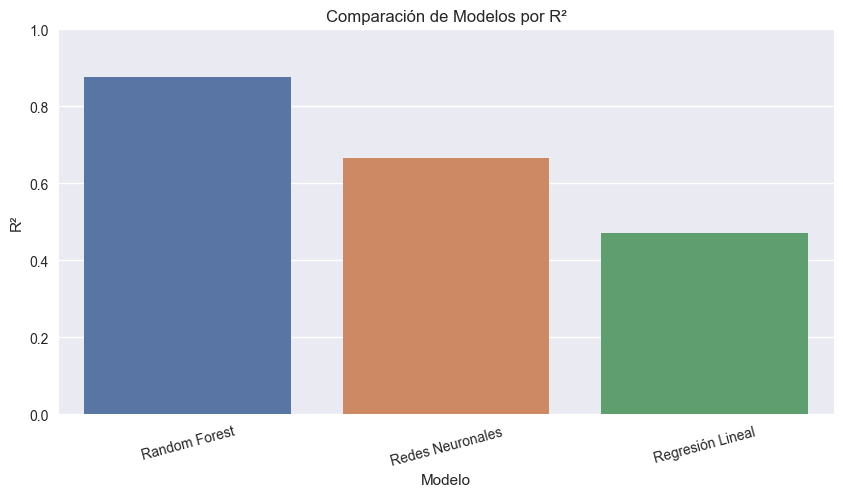

In [42]:

plt.figure(figsize=(10, 5))
sns.barplot(data=results, x='Modelo', y='R²', palette='deep')
plt.title('Comparación de Modelos por R²')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

### **MAE**

C:\Users\HARRISON\AppData\Local\Temp\ipykernel_22152\2225044459.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()  # Quitar leyenda, porque ya está en el eje x


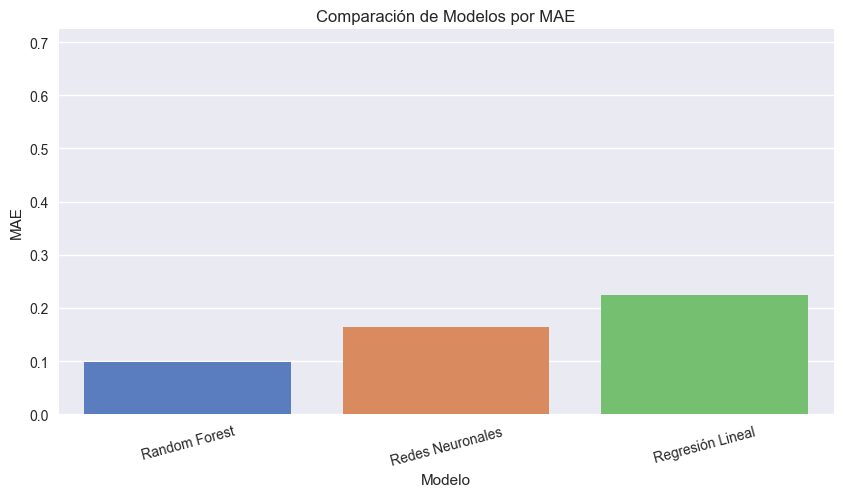

In [47]:

plt.figure(figsize=(10, 5))
sns.barplot(data=results, x='Modelo', y='MAE', hue='Modelo', palette='muted', dodge=False)
plt.title('Comparación de Modelos por MAE')
plt.ylim(0, results['MAE'].max() + 0.5)
plt.xticks(rotation=15)
plt.ylabel('MAE')
plt.legend().remove()  # Quitar leyenda, porque ya está en el eje x
plt.show()

### **MSE**

C:\Users\carlo\AppData\Local\Temp\ipykernel_6316\4017355860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Modelo', y='MSE', palette='deep')


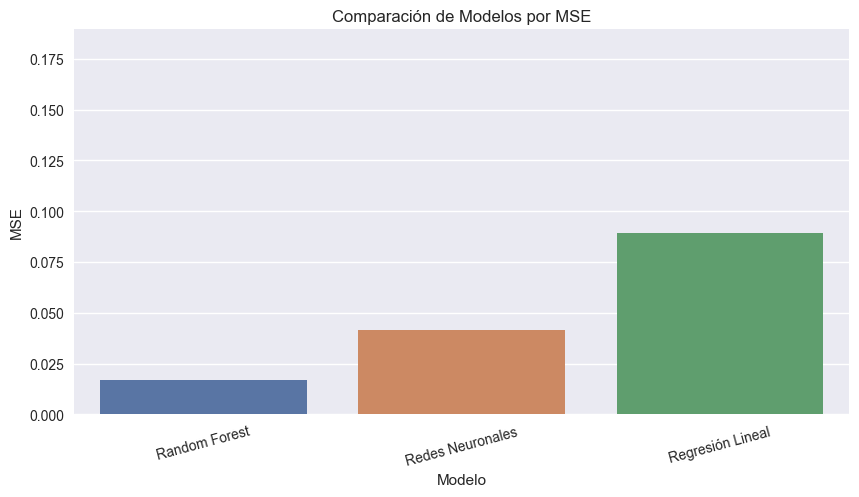

In [150]:
plt.figure(figsize=(10, 5))
sns.barplot(data=results, x='Modelo', y='MSE', palette='deep')
plt.title('Comparación de Modelos por MSE')
plt.ylim(0, results['MSE'].max() + 0.1)  
plt.xticks(rotation=15)
plt.show()

## 4. Análisis y Conclusiones